In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from bioinfokit import analys, visuz

In [47]:
from bioinfokit import analys, visuz

#### Protein protein interaction data

In [2]:
#Whole interactome protein protein interaction 
ppi = pd.read_table(r"F:\snijesh\OneDrive - St John's National Academy of Health Sciences\Re_analysis\Hippie\hippie_current.txt", sep="\t")
ppi

#There are about 411430 protein-protein interactions

,Gene1,EntrezID1,Gene2,EntrezID2,Score,Reference
0,AL1A1_HUMAN,216,AL1A1_HUMAN,216,0.76,"experiments:in vivo,Two-hybrid;pmids:12081471,..."
1,ITA7_HUMAN,3679,ACHA_HUMAN,1134,0.73,"experiments:in vivo,Affinity Capture-Western,a..."
2,NEB1_HUMAN,55607,ACTG_HUMAN,71,0.65,"experiments:in vitro,in vivo;pmids:9362513,120..."
3,SRGN_HUMAN,5552,CD44_HUMAN,960,0.63,"experiments:in vivo;pmids:9334256,16189514,167..."
4,GRB7_HUMAN,2886,ERBB2_HUMAN,2064,0.90,"experiments:in vitro,in vivo,Reconstituted Com..."
...,...,...,...,...,...,...
411425,CH60_HUMAN,3329,RM41_HUMAN,64975,0.49,pmids:29568061;sources:IntAct
411426,CS010_HUMAN,56005,MTL5_HUMAN,9633,0.63,experiments:cross-linking study;pmids:30021884...
411427,KI67_HUMAN,4288,C1TM_HUMAN,25902,0.63,experiments:anti tag coimmunoprecipitation;pmi...
411428,DUX4_HUMAN,22947,TBB2A_HUMAN,7280,0.56,experiments:pull down;pmids:26816005;sources:I...


```diff
- There are about about 411430 protein-protein interactions
```

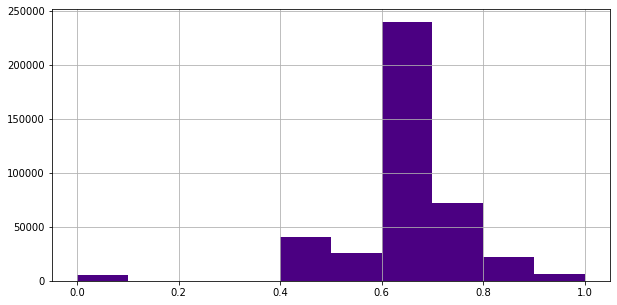

In [97]:
# Histogram
#plt.hist(ppi['Score'], 10, range=[0, 1], facecolor='indigo', align='mid')
ppi['Score'].hist(bins=10, figsize=[10,5], facecolor='indigo')

In [32]:
#Calculate the number of interactions between the range
s_bl_4, c = (ppi[ppi['Score'] < 0.4]).shape #There are about 5726 interactions below 0.4
s_abv_4, c = (ppi[ppi['Score'] > 0.4]).shape #There are about 405704  interactions above 0.4
s_4_5, c = (ppi[(ppi['Score'] >=0.4) & (ppi["Score"]<=0.5)]).shape #There are about 40939  interactions between 0.4 & 0.5
s_5_6, c = (ppi[(ppi['Score'] >=0.5) & (ppi["Score"]<=0.6)]).shape #There are about 25313  interactions between 0.5 & 0.6
s_6_7, c = (ppi[(ppi['Score'] >=0.6) & (ppi["Score"]<=0.7)]).shape #There are about 239697  interactions between 0.6 & 0.7
s_7_8, c = (ppi[(ppi['Score'] >=0.7) & (ppi["Score"]<=0.8)]).shape #There are about 75780  interactions between 0.7 & 0.8
s_8_9, c = (ppi[(ppi['Score'] >=0.8) & (ppi["Score"]<=0.9)]).shape #There are about 24527  interactions between 0.8 & 0.9
s_9_1, c = (ppi[(ppi['Score'] >=0.9) & (ppi["Score"]<=1)]).shape #There are about 5903  interactions between 0.9 & 1

In [34]:
# initialise data of lists. 
data = {'Range':['below 0.4', 'above 0.4', 'between 0.4 & 0.5', 'between 0.5 & 0.6', 
                'between 0.6 & 0.7', 'between 0.7 & 0.8', 'between 0.8 & 0.9', 'between 0.9 & 1'], 
        'Interactions':[s_bl_4, s_abv_4, s_4_5, s_5_6, s_6_7, s_7_8, s_8_9, s_9_1]}
  
# Creates pandas DataFrame. 
#df = pd.DataFrame(data, index =['Score', 'Score', 'Score', 'Score', 'Score', 'Score', 'Score', 'Score']) 
df = pd.DataFrame(data)
df

,Range,Interactions
0,below 0.4,5726
1,above 0.4,405704
2,between 0.4 & 0.5,40939
3,between 0.5 & 0.6,25313
4,between 0.6 & 0.7,239697
5,between 0.7 & 0.8,75780
6,between 0.8 & 0.9,24527
7,between 0.9 & 1,5903


In [38]:
##Load ER treated data
ER_full = pd.read_table(r"F:\snijesh\OneDrive - St John's National Academy of Health Sciences\Re_analysis\SNJ_WorkingDirectory\GSE61368\er_filtered\ER_full.txt", sep="\t")
ER_full

,Entrez_Gene_ID,Symbol,A,Coef.DHTx,Coef.E2x,Coef.E2s_DHTx,p.value.DHTx,p.value.E2x,p.value.E2s_DHTx,p.value.adj.DHTx,p.value.adj.E2x,p.value.adj.E2s_DHTx,F,F.p.value,BASE_GENES
0,5174,PDZK1,9.229282,-0.187992,3.528890,3.441374,0.310088,2.453470e-12,3.560280e-12,0.907006,1.197360e-07,2.895870e-08,266.676939,1.747910e-13,0
1,11031,RAB31,11.616050,0.558029,1.904584,1.909814,0.000483,1.295930e-10,1.245520e-10,0.139492,2.108180e-06,5.525900e-07,116.597439,8.377770e-11,0
2,112398,EGLN2,13.039199,0.135529,1.322813,1.444609,0.154032,1.915510e-10,5.342870e-11,0.834817,2.337070e-06,2.897200e-07,142.632824,1.891100e-11,0
3,203328,SUSD3,8.791023,-0.288183,1.890399,1.761686,0.051534,4.239560e-10,1.157360e-09,0.725424,4.138060e-06,3.889890e-06,140.602069,2.103180e-11,0
4,8309,ACOX2,10.297086,-0.120597,1.993663,1.724570,0.435776,8.130590e-10,6.235610e-09,0.939835,4.963180e-06,1.217270e-05,109.410215,1.336690e-10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25181,9674,KIAA0040,9.043923,-0.150443,0.007255,-0.106013,0.190727,9.482238e-01,3.497002e-01,0.850656,9.982222e-01,7.966772e-01,1.015312,4.127829e-01,1
25182,80303,EFHD1,14.169191,0.232138,0.007368,0.223824,0.111267,9.579242e-01,1.236005e-01,0.802689,9.982409e-01,6.489153e-01,1.778771,1.932595e-01,1
25183,3133,HLA-E,9.753298,0.256037,-0.007478,-0.164282,0.133409,9.636818e-01,3.250286e-01,0.820401,9.982409e-01,7.811608e-01,2.318880,1.157772e-01,1
25184,79884,FLJ21159,7.447539,0.144771,-0.003667,0.044569,0.123567,9.676126e-01,6.230788e-01,0.812450,9.982409e-01,9.062382e-01,1.210655,3.390884e-01,1


In [48]:
ER_full[ER_full['p.value.E2x'] <= 0.05]

,Entrez_Gene_ID,Symbol,A,Coef.DHTx,Coef.E2x,Coef.E2s_DHTx,p.value.DHTx,p.value.E2x,p.value.E2s_DHTx,p.value.adj.DHTx,p.value.adj.E2x,p.value.adj.E2s_DHTx,F,F.p.value,BASE_GENES
0,5174,PDZK1,9.229282,-0.187992,3.528890,3.441374,0.310088,2.453470e-12,3.560280e-12,0.907006,1.197360e-07,2.895870e-08,266.676939,1.747910e-13,0
1,11031,RAB31,11.616050,0.558029,1.904584,1.909814,0.000483,1.295930e-10,1.245520e-10,0.139492,2.108180e-06,5.525900e-07,116.597439,8.377770e-11,0
2,112398,EGLN2,13.039199,0.135529,1.322813,1.444609,0.154032,1.915510e-10,5.342870e-11,0.834817,2.337070e-06,2.897200e-07,142.632824,1.891100e-11,0
3,203328,SUSD3,8.791023,-0.288183,1.890399,1.761686,0.051534,4.239560e-10,1.157360e-09,0.725424,4.138060e-06,3.889890e-06,140.602069,2.103180e-11,0
4,8309,ACOX2,10.297086,-0.120597,1.993663,1.724570,0.435776,8.130590e-10,6.235610e-09,0.939835,4.963180e-06,1.217270e-05,109.410215,1.336690e-10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24962,116496,C1orf24,10.384744,-0.059203,-0.183741,-0.157365,0.499472,4.815157e-02,8.538030e-02,0.953626,8.336853e-01,6.174868e-01,1.998680,1.564132e-01,1
24963,27018,NGFRAP1,8.991472,0.417495,0.362519,0.424614,0.025769,4.850174e-02,2.370158e-02,0.632271,8.337376e-01,4.930742e-01,2.870187,7.041022e-02,1
24964,2214,FCGR3A,7.412881,-0.236857,-0.201727,-0.037358,0.023437,4.853994e-02,6.970104e-01,0.621423,8.337376e-01,9.295655e-01,3.124753,5.645561e-02,1
24965,2678,GGT1,10.370665,0.303487,-0.381430,0.072152,0.109864,4.944968e-02,6.922059e-01,0.801692,8.337376e-01,9.283346e-01,5.059432,1.241191e-02,1


```diff
- There are about 2207 significant genes in the data by p-value <= 0.05
```

In [67]:
##Load ER treated data
ER_sig_base = pd.read_table(r"F:\snijesh\OneDrive - St John's National Academy of Health Sciences\Re_analysis\SNJ_WorkingDirectory\GSE61368\er_filtered\ER_sig.txt", sep="\t")
ER_sig_base

,Entrez_Gene_ID,Symbol,A,Coef.DHTx,Coef.E2x,Coef.E2s_DHTx,p.value.DHTx,p.value.E2x,p.value.E2s_DHTx,p.value.adj.DHTx,p.value.adj.E2x,p.value.adj.E2s_DHTx,F,F.p.value,BASE_GENES,FC_ABS,FC
0,57007,CMKOR1,10.132746,-0.334370,-1.519036,-1.908032,0.060754,1.207390e-07,5.504940e-09,0.741795,3.466140e-04,1.119410e-05,61.587183,8.435130e-09,0,2.865994,-2.865994
1,5239,PGM5,8.817042,-0.417614,-1.420298,-1.625083,0.007780,2.313710e-08,3.613900e-09,0.460232,8.788480e-05,8.016780e-06,65.581854,5.402670e-09,0,2.676407,-2.676407
2,5055,SERPINB2,8.186419,-0.480303,-1.388986,-1.737832,0.020656,1.727990e-06,9.926890e-08,0.597921,2.056860e-03,1.216930e-04,37.030834,2.823680e-07,0,2.618945,-2.618945
3,8537,BCAS1,11.385143,-0.065445,-1.133509,-1.295215,0.752046,4.861140e-05,1.122890e-05,0.984183,2.737897e-02,4.857995e-03,22.729911,6.633680e-06,0,2.193917,-2.193917
4,10143,CLEC3A,8.126207,-0.582846,-1.087106,-1.086006,0.012439,8.535930e-05,8.624630e-05,0.530173,4.165791e-02,2.260463e-02,12.600803,2.025470e-04,0,2.124475,-2.124475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2421,12,SERPINA3,9.080826,0.009029,2.041669,1.346094,0.984783,5.046000e-04,1.099267e-02,0.999467,1.558608e-01,3.863310e-01,9.512538,8.506570e-04,0,4.117216,4.117216
2422,3487,IGFBP4,10.620955,0.152272,2.242953,1.749949,0.566062,2.713050e-07,5.804320e-06,0.963561,5.092500e-04,2.981771e-03,37.783866,2.466610e-07,1,4.733649,4.733649
2423,26353,HSPB8,9.242712,0.094658,2.391767,2.512073,0.686545,2.341050e-08,1.197600e-08,0.977481,8.788480e-05,2.247940e-05,72.913346,2.536580e-09,1,5.247996,5.247996
2424,9687,GREB1,9.347909,0.380349,2.904512,2.808421,0.033310,1.058040e-11,1.735100e-11,0.667172,2.581770e-07,1.209680e-07,180.908656,3.222200e-12,1,7.487646,7.487646


In [63]:
genenames = ('PDZK1', 'GREB1', 'HSPB8', 'IGFBP4', 'SERPINA3', 'ACOX2', 'CMKOR1', 'PGM5', 'SERPINB2', 'BCAS1', 'CLEC3A')

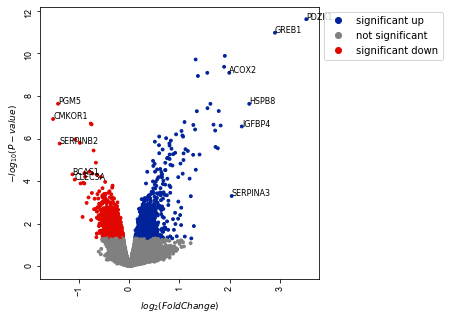

In [61]:
#change parameter setting by keeping only significant pvalue of 0.1
visuz.gene_exp.volcano(df=ER_full, lfc='Coef.E2x', pv='p.value.E2x',
                       lfc_thr=0, pv_thr=0.05,
                       color=("#00239CFF", "grey", "#E10600FF"), geneid="Symbol", genenames=genenames,
                       plotlegend=True, legendpos='upper right', show=True,
                       legendanchor=(1.46,1))

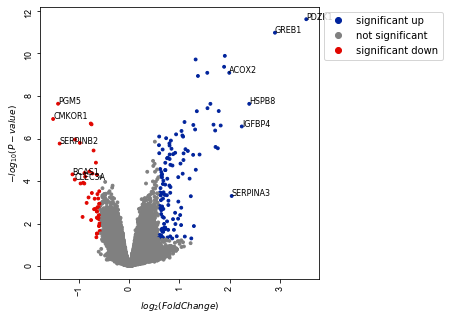

In [62]:
#change parameter setting by keeping only significant pvalue of 0.1
visuz.gene_exp.volcano(df=ER_full, lfc='Coef.E2x', pv='p.value.E2x',
                       lfc_thr=0.584962501, pv_thr=0.05,
                       color=("#00239CFF", "grey", "#E10600FF"), geneid="Symbol", genenames=genenames,
                       plotlegend=True, legendpos='upper right', show=True,
                       legendanchor=(1.46,1))

In [65]:
#Map the ER genes to the ppi
ppi_fil = ppi[['EntrezID1', 'EntrezID2', 'Score']]
ppi_fil = ppi_fil[ppi_fil['Score'] >= 0.4]
ppi_fil

,EntrezID1,EntrezID2,Score
0,216,216,0.76
1,3679,1134,0.73
2,55607,71,0.65
3,5552,960,0.63
4,2886,2064,0.90
...,...,...,...
411425,3329,64975,0.49
411426,56005,9633,0.63
411427,4288,25902,0.63
411428,22947,7280,0.56


In [64]:
ppi.columns

Index(['Gene1', 'EntrezID1', 'Gene2', 'EntrezID2', 'Score', 'Reference'], dtype='object')

In [68]:
ER_sig_base.columns

Index(['Entrez_Gene_ID', 'Symbol', 'A', 'Coef.DHTx', 'Coef.E2x',
       'Coef.E2s_DHTx', 'p.value.DHTx', 'p.value.E2x', 'p.value.E2s_DHTx',
       'p.value.adj.DHTx', 'p.value.adj.E2x', 'p.value.adj.E2s_DHTx', 'F',
       'F.p.value', 'BASE_GENES', 'FC_ABS', 'FC'],
      dtype='object')

In [70]:
ER_Genes = ER_sig_base[['Entrez_Gene_ID', 'Symbol', 'Coef.DHTx', 'Coef.E2x','Coef.E2s_DHTx',
                        'p.value.DHTx', 'p.value.E2x', 'p.value.E2s_DHTx',
                        'BASE_GENES', 'FC_ABS', 'FC']]
ER_Genes.rename(columns = {'Entrez_Gene_ID':'EntrezID1', 'Symbol':'Gene'}, inplace = True)
ER_Genes

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


,EntrezID1,Gene,Coef.DHTx,Coef.E2x,Coef.E2s_DHTx,p.value.DHTx,p.value.E2x,p.value.E2s_DHTx,BASE_GENES,FC_ABS,FC
0,57007,CMKOR1,-0.334370,-1.519036,-1.908032,0.060754,1.207390e-07,5.504940e-09,0,2.865994,-2.865994
1,5239,PGM5,-0.417614,-1.420298,-1.625083,0.007780,2.313710e-08,3.613900e-09,0,2.676407,-2.676407
2,5055,SERPINB2,-0.480303,-1.388986,-1.737832,0.020656,1.727990e-06,9.926890e-08,0,2.618945,-2.618945
3,8537,BCAS1,-0.065445,-1.133509,-1.295215,0.752046,4.861140e-05,1.122890e-05,0,2.193917,-2.193917
4,10143,CLEC3A,-0.582846,-1.087106,-1.086006,0.012439,8.535930e-05,8.624630e-05,0,2.124475,-2.124475
...,...,...,...,...,...,...,...,...,...,...,...
2421,12,SERPINA3,0.009029,2.041669,1.346094,0.984783,5.046000e-04,1.099267e-02,0,4.117216,4.117216
2422,3487,IGFBP4,0.152272,2.242953,1.749949,0.566062,2.713050e-07,5.804320e-06,1,4.733649,4.733649
2423,26353,HSPB8,0.094658,2.391767,2.512073,0.686545,2.341050e-08,1.197600e-08,1,5.247996,5.247996
2424,9687,GREB1,0.380349,2.904512,2.808421,0.033310,1.058040e-11,1.735100e-11,1,7.487646,7.487646


In [82]:
merged_data = pd.merge(ppi_fil, ER_Genes, how='inner', left_on='EntrezID1', right_on='EntrezID1')
merged_data2 = pd.merge(ppi_fil, ER_Genes, how='inner', left_on='EntrezID2', right_on='EntrezID1')

In [83]:
#Rename the columns accordingly
merged_data2.rename(columns = {'EntrezID1_x':'EntrezID1', 'EntrezID1_y':'Drop'}, inplace = True)
#Select requred columns
merged_data2 = merged_data2[['EntrezID1', 'EntrezID2', 'Score', 'Gene', 'Coef.DHTx',
       'Coef.E2x', 'Coef.E2s_DHTx', 'p.value.DHTx', 'p.value.E2x',
       'p.value.E2s_DHTx', 'BASE_GENES', 'FC_ABS', 'FC']]
#Merge the data
combine = [merged_data, merged_data2]
combined_data = pd.concat(combine)
#remove duplicates
combined_data_rm = combined_data.drop_duplicates()
combined_data_rm

,EntrezID1,EntrezID2,Score,Gene,Coef.DHTx,Coef.E2x,Coef.E2s_DHTx,p.value.DHTx,p.value.E2x,p.value.E2s_DHTx,BASE_GENES,FC_ABS,FC
0,4771,2064,0.79,NF2,-0.167949,-0.288594,-0.089731,0.089532,0.006938,0.347948,0,1.221450,-1.221450
1,4771,960,0.88,NF2,-0.167949,-0.288594,-0.089731,0.089532,0.006938,0.347948,0,1.221450,-1.221450
2,4771,6711,0.79,NF2,-0.167949,-0.288594,-0.089731,0.089532,0.006938,0.347948,0,1.221450,-1.221450
3,4771,6386,0.78,NF2,-0.167949,-0.288594,-0.089731,0.089532,0.006938,0.347948,0,1.221450,-1.221450
4,4771,5829,0.75,NF2,-0.167949,-0.288594,-0.089731,0.089532,0.006938,0.347948,0,1.221450,-1.221450
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43193,6128,256394,0.63,SERPINA11,0.134172,0.258251,0.264322,0.132533,0.007795,0.006721,0,1.196028,1.196028
43194,8345,127077,0.63,OR2T11,-0.116945,-0.160425,0.031035,0.108354,0.033235,0.657299,0,1.117616,-1.117616
43195,6787,56097,0.63,PCDHGC5,0.187808,0.162998,0.151362,0.006414,0.015060,0.022311,0,1.119611,1.119611
43196,3313,647286,0.63,LOC647286,-0.156457,-0.195639,-0.203701,0.080258,0.033040,0.027330,0,1.145231,-1.145231


In [81]:
#Save the file to local directory
combined_data_rm.to_csv(r"F:\snijesh\OneDrive - St John's National Academy of Health Sciences\Re_analysis\SNJ_WorkingDirectory\GSE61368\er_filtered\er_ppi.txt", sep="\t", index=False)

#### Degree Distribution
<img src = "F:/snijesh/OneDrive\-\St\John's\National\Academy\of\Health\Sciences/Re_analysis/SNJ_WorkingDirectory/GSE61368/er_filtered/degree.jpg">

```diff
+ 1987 Genes in the PPI

- Missed Base Genes = 7

+ Total Number of Hubs = 68

+ Total Number of Base as Hubs = 17
```

#### Missed Base genes

In [99]:
missed_base_genes = pd.read_table(r"F:\snijesh\OneDrive - St John's National Academy of Health Sciences\Re_analysis\SNJ_WorkingDirectory\GSE61368\er_filtered\missed_base_by_ppi.txt", sep="\t")
missed_base_genes

,EntrezID,GeneID,Class,Is_BASE
0,400451,FAM174B,AR,1
1,1955,EGFL5,ER,1
2,4603,MYBL1,ER,1
3,7162,TPBG,ER,1
4,9771,GFR,ER,1
5,55643,BTBD2,ER,1
6,192134,B3GNT6,ER,1


In [100]:
## Functional Similarity

semantic = pd.read_table(r"F:\snijesh\OneDrive - St John's National Academy of Health Sciences\Re_analysis\SNJ_WorkingDirectory\GSE61368\er_filtered\GOSemSim\result_mf.txt", sep="\t")
semantic

,Var1,Var2,Freq
1,2099,2099,1.000
2,4609,2099,0.797
3,4171,2099,0.519
4,51547,2099,0.522
5,120892,2099,0.534
...,...,...,...
2961837,54847,127077,0.081
2961838,119694,127077,1.000
2961839,64579,127077,0.117
2961840,256394,127077,0.067


In [ ]:
merged_data2 = pd.merge(ppi_fil, ER_Genes, how='inner', left_on='EntrezID2', right_on='EntrezID1')

In [103]:
ppin = pd.read_excel(r"F:\snijesh\OneDrive - St John's National Academy of Health Sciences\Re_analysis\Hippie\hippie_current.xlsx")
ppin

,Gene1,EntrezID1,Gene2,EntrezID2,Score,Reference
0,AL1A1_HUMAN,216,AL1A1_HUMAN,216,0.76,"experiments:in vivo,Two-hybrid;pmids:12081471,..."
1,ITA7_HUMAN,3679,ACHA_HUMAN,1134,0.73,"experiments:in vivo,Affinity Capture-Western,a..."
2,NEB1_HUMAN,55607,ACTG_HUMAN,71,0.65,"experiments:in vitro,in vivo;pmids:9362513,120..."
3,SRGN_HUMAN,5552,CD44_HUMAN,960,0.63,"experiments:in vivo;pmids:9334256,16189514,167..."
4,GRB7_HUMAN,2886,ERBB2_HUMAN,2064,0.90,"experiments:in vitro,in vivo,Reconstituted Com..."
...,...,...,...,...,...,...
822855,RM41_HUMAN,64975,CH60_HUMAN,3329,0.49,pmids:29568061;sources:IntAct
822856,MTL5_HUMAN,9633,CS010_HUMAN,56005,0.63,experiments:cross-linking study;pmids:30021884...
822857,C1TM_HUMAN,25902,KI67_HUMAN,4288,0.63,experiments:anti tag coimmunoprecipitation;pmi...
822858,TBB2A_HUMAN,7280,DUX4_HUMAN,22947,0.56,experiments:pull down;pmids:26816005;sources:I...


In [ ]:
merged_data2 = pd.merge(ppi_fil, ER_Genes, how='left', left_on='EntrezID2', right_on='EntrezID1')

In [104]:
ER_Genes

,EntrezID1,Gene,Coef.DHTx,Coef.E2x,Coef.E2s_DHTx,p.value.DHTx,p.value.E2x,p.value.E2s_DHTx,BASE_GENES,FC_ABS,FC
0,57007,CMKOR1,-0.334370,-1.519036,-1.908032,0.060754,1.207390e-07,5.504940e-09,0,2.865994,-2.865994
1,5239,PGM5,-0.417614,-1.420298,-1.625083,0.007780,2.313710e-08,3.613900e-09,0,2.676407,-2.676407
2,5055,SERPINB2,-0.480303,-1.388986,-1.737832,0.020656,1.727990e-06,9.926890e-08,0,2.618945,-2.618945
3,8537,BCAS1,-0.065445,-1.133509,-1.295215,0.752046,4.861140e-05,1.122890e-05,0,2.193917,-2.193917
4,10143,CLEC3A,-0.582846,-1.087106,-1.086006,0.012439,8.535930e-05,8.624630e-05,0,2.124475,-2.124475
...,...,...,...,...,...,...,...,...,...,...,...
2421,12,SERPINA3,0.009029,2.041669,1.346094,0.984783,5.046000e-04,1.099267e-02,0,4.117216,4.117216
2422,3487,IGFBP4,0.152272,2.242953,1.749949,0.566062,2.713050e-07,5.804320e-06,1,4.733649,4.733649
2423,26353,HSPB8,0.094658,2.391767,2.512073,0.686545,2.341050e-08,1.197600e-08,1,5.247996,5.247996
2424,9687,GREB1,0.380349,2.904512,2.808421,0.033310,1.058040e-11,1.735100e-11,1,7.487646,7.487646


In [106]:
merged_da = pd.merge(ER_Genes, ppin, how='left', on='EntrezID1')
merged_da

,EntrezID1,Gene,Coef.DHTx,Coef.E2x,Coef.E2s_DHTx,p.value.DHTx,p.value.E2x,p.value.E2s_DHTx,BASE_GENES,FC_ABS,FC,Gene1,Gene2,EntrezID2,Score,Reference
0,57007,CMKOR1,-0.334370,-1.519036,-1.908032,0.060754,1.207390e-07,5.504940e-09,0,2.865994,-2.865994,"CXCR7_HUMAN,ACKR3_HUMAN",GRB2_HUMAN,2885.0,0.63,experiments:peptide array;pmids:17474147;sourc...
1,57007,CMKOR1,-0.334370,-1.519036,-1.908032,0.060754,1.207390e-07,5.504940e-09,0,2.865994,-2.865994,"CXCR7_HUMAN,ACKR3_HUMAN",AT132_HUMAN,23400.0,0.72,"experiments:ubiquitin reconstruction,Two-hybri..."
2,57007,CMKOR1,-0.334370,-1.519036,-1.908032,0.060754,1.207390e-07,5.504940e-09,0,2.865994,-2.865994,"CXCR7_HUMAN,ACKR3_HUMAN",ATPO_HUMAN,539.0,0.83,experiments:affinity chromatography technology...
3,57007,CMKOR1,-0.334370,-1.519036,-1.908032,0.060754,1.207390e-07,5.504940e-09,0,2.865994,-2.865994,"CXCR7_HUMAN,ACKR3_HUMAN",ATPD_HUMAN,513.0,0.63,experiments:affinity chromatography technology...
4,57007,CMKOR1,-0.334370,-1.519036,-1.908032,0.060754,1.207390e-07,5.504940e-09,0,2.865994,-2.865994,"CXCR7_HUMAN,ACKR3_HUMAN",ATPB_HUMAN,506.0,0.83,experiments:affinity chromatography technology...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85796,5174,PDZK1,-0.187992,3.528890,3.441374,0.310088,2.453470e-12,3.560280e-12,0,11.542551,11.542551,NHRF3_HUMAN,PUS3_HUMAN,83480.0,0.49,pmids:30126976;sources:IntAct
85797,5174,PDZK1,-0.187992,3.528890,3.441374,0.310088,2.453470e-12,3.560280e-12,0,11.542551,11.542551,NHRF3_HUMAN,PIGL_HUMAN,9487.0,0.49,pmids:30126976;sources:IntAct
85798,5174,PDZK1,-0.187992,3.528890,3.441374,0.310088,2.453470e-12,3.560280e-12,0,11.542551,11.542551,NHRF3_HUMAN,GPR17_HUMAN,2840.0,0.49,pmids:30126976;sources:IntAct
85799,5174,PDZK1,-0.187992,3.528890,3.441374,0.310088,2.453470e-12,3.560280e-12,0,11.542551,11.542551,NHRF3_HUMAN,SPHK1_HUMAN,8877.0,0.63,experiments:anti tag coimmunoprecipitation;pmi...


In [109]:
merged_ppi_da = merged_da[['EntrezID1', 'EntrezID2', 'Score']]
merged_ppi_da.to_csv(r"F:\snijesh\OneDrive - St John's National Academy of Health Sciences\Re_analysis\SNJ_WorkingDirectory\GSE61368\er_filtered\er_ppi_edge_map.txt", sep="\t", index=False)

In [110]:
edge_map = pd.read_table(r"F:\snijesh\OneDrive - St John's National Academy of Health Sciences\Re_analysis\SNJ_WorkingDirectory\GSE61368\er_filtered\er_edge_map_new.txt", sep='\t')
edge_map

,EntrezID1,EntrezID2,Score,ID1,ID2
0,57007,2706,0.72,1,1
1,5239,7414,0.49,1,1
2,5055,5055,0.52,1,1
3,5055,5934,0.63,1,1
4,5055,4026,0.63,1,1
...,...,...,...,...,...
10173,5174,6533,0.63,1,1
10174,5174,10455,0.63,1,1
10175,5174,400745,0.63,1,1
10176,5174,285527,0.63,1,1


In [113]:
edge_semantic_map = pd.merge(edge_map,semantic, left_on=['EntrezID1','EntrezID2'], right_on=['Var1', 'Var2'],how ='left')
edge_semantic_map

,EntrezID1,EntrezID2,Score,ID1,ID2,Var1,Var2,Freq
0,57007,2706,0.72,1,1,57007.0,2706.0,0.395
1,5239,7414,0.49,1,1,5239.0,7414.0,0.252
2,5055,5055,0.52,1,1,5055.0,5055.0,1.000
3,5055,5934,0.63,1,1,5055.0,5934.0,0.120
4,5055,4026,0.63,1,1,5055.0,4026.0,0.120
...,...,...,...,...,...,...,...,...
10173,5174,6533,0.63,1,1,5174.0,6533.0,0.090
10174,5174,10455,0.63,1,1,NaN,NaN,NaN
10175,5174,400745,0.63,1,1,NaN,NaN,NaN
10176,5174,285527,0.63,1,1,5174.0,285527.0,1.000


In [114]:
edge_semantic_map.to_csv(r"F:\snijesh\OneDrive - St John's National Academy of Health Sciences\Re_analysis\SNJ_WorkingDirectory\GSE61368\er_filtered\edge_semantic_map_er.txt", sep="\t")

### Considering genes with High Differential Expression

In [118]:
degs1_4 = pd.read_table(r"F:\snijesh\OneDrive - St John's National Academy of Health Sciences\Re_analysis\SNJ_WorkingDirectory\GSE61368\er_filtered\e2_degs.txt", sep="\t")
degs1_4

,Entrez_Gene_ID,Symbol,Coef.E2x,FC_ABS,FC
0,5174,PDZK1,3.528890,11.542551,11.542551
1,9687,GREB1,2.904512,7.487646,7.487646
2,26353,HSPB8,2.391767,5.247996,5.247996
3,3487,IGFBP4,2.242953,4.733649,4.733649
4,12,SERPINA3,2.041669,4.117216,4.117216
...,...,...,...,...,...
314,54431,DNAJC10,0.486575,1.401115,1.401115
315,4026,LPP,-0.486142,1.400694,-1.400694
316,23767,FLRT3,-0.486040,1.400596,-1.400596
317,23352,RBAF600,-0.485631,1.400198,-1.400198


In [119]:
degs1_4['FC_ABS'].quantile([0.33, 0.66])

0.33    1.465887
0.66    1.626309
Name: FC_ABS, dtype: float64

In [120]:
len(degs1_4[degs1_4['FC_ABS']< 1.466]) #Low Confidence

106

In [121]:
len(degs1_4[(degs1_4['FC_ABS']>=1.466) & (degs1_4['FC_ABS']<1.626)]) #Medium Confidence

104

In [122]:
len(degs1_4[degs1_4['FC_ABS'] >=1.606]) #Higher Confidence

113